In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error
from extract_dynamical_systems import rbf, find_radial_basis_function_means, least_squares_minimization, calculate_x_from_vector, phi, solve_linear_system_full_data
from scipy.integrate import odeint

# Task 4/5: Time-delay embedding

# Part One

### Load Data Set and Visualize it

(1000, 2)


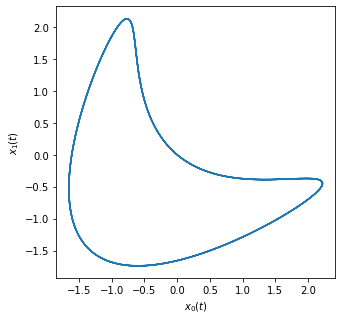

In [2]:
takens_data = np.loadtxt('task4/takens_1.txt')
print(takens_data.shape)

#visualize data set
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.plot(takens_data[:, 0], takens_data[:, 1])
ax.set_ylabel("$x_1(t)$")
ax.set_xlabel("$x_0(t)$")
plt.savefig("task4/figures/task4_takens_data")

### Plot both coordinates against time

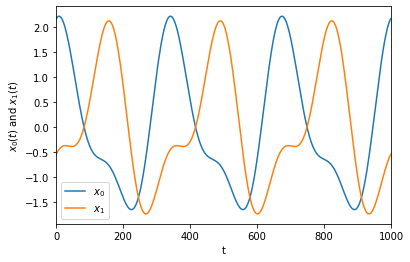

In [3]:
fig, ax = plt.subplots(1,1)
plt.plot(takens_data[:, 0], label="$x_0$")
plt.plot(takens_data[:, 1], label="$x_1$")
ax.set_xlim(0,1000)
ax.set_ylabel("$x_0(t)$ and $x_1(t)$")
ax.set_xlabel("t")
ax.legend()
plt.savefig("task4/figures/task4_takens_data_vs_time")

### Plot first coordinate against delayed versions

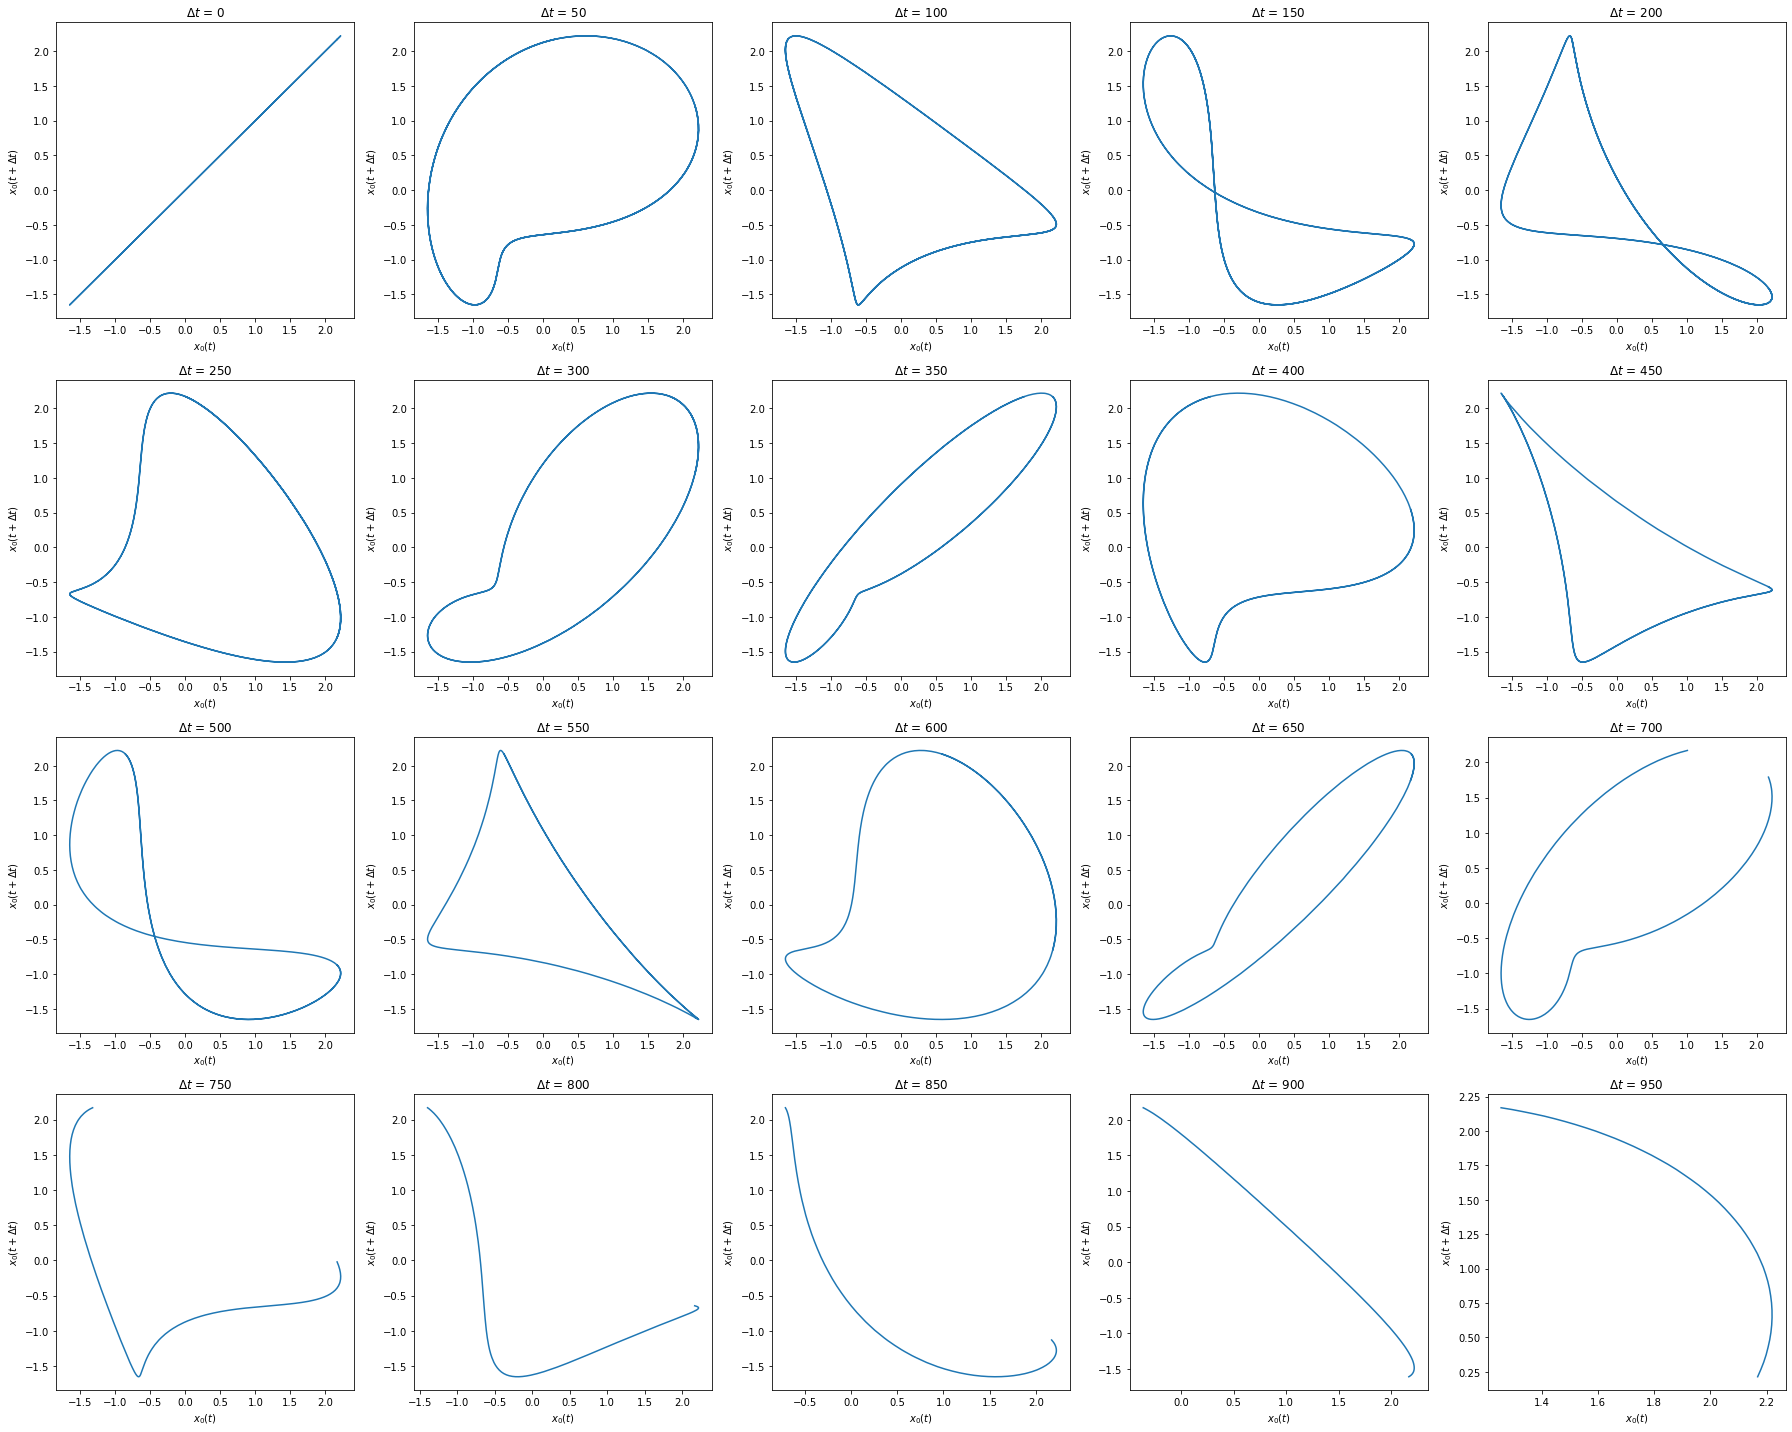

In [4]:
#set size of first delta_t
interval = 50

#plot first coordinate against its delayed versions
takens_length = takens_data.shape[0]

num_figs = takens_length // interval
num_col = 5
num_row = -(-num_figs // num_col)

figsize = 5
fig, ax = plt.subplots(num_row, num_col, figsize=(figsize * num_col, figsize * num_row))

for i in range(num_row):
    for j in range(num_col):
        delta_t = interval * (i * num_col + j)
        if num_row == 1:
            ax[j].set_title("$\Delta t$ = " + f"{delta_t}")
            ax[j].set_ylabel("$x_0(t + \Delta t)$")
            ax[j].set_xlabel("$x_0(t)$")
            ax[j].plot(takens_data[:takens_length - delta_t,0], takens_data[delta_t:,0])
        else:
            ax[i][j].set_title("$\Delta t$ = " + f"{delta_t}")
            ax[i][j].set_ylabel("$x_0(t + \Delta t)$")
            ax[i][j].set_xlabel("$x_0(t)$")
            ax[i][j].plot(takens_data[:takens_length - delta_t,0], takens_data[delta_t:,0])

plt.tight_layout()
plt.savefig("task4/figures/task4_first_coord_delayed")

## Part Two

In [5]:
#Initialize model of the lorenz attractor
def modelLorenz(t, x, sigma, rho, beta):
    X, Y, Z = x[:]
    dxdt = sigma*(Y-X)
    dydt = X*(rho-Z)-Y
    dzdt = X*Y-beta*Z
    return [dxdt, dydt, dzdt]

### Plot Lorenz attractor

In [6]:
#Setting the parameters 
t_0 = 0
t_end = 50
dt = 0.01
NT = int((t_end-t_0)/dt)
time = np.linspace(t_0,t_end,NT)
x_0 = [10, 10, 10]
sigma = 10
rho = 28
beta = 8/3

#Solving the differential equation system of the lorenz attractor 
sol_lorenz = solve_ivp(modelLorenz, t_span=[t_0, t_end], y0=x_0, t_eval=time, args=(sigma, rho, beta), method='LSODA', rtol=1e-8, atol=1e-8)

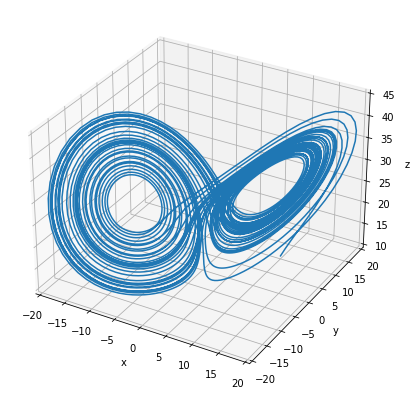

In [7]:
#Plot of the solution trajectory 
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'), figsize=(7,7))
n = 1
ax.plot(sol_lorenz.y[0][::n], sol_lorenz.y[1][::n], sol_lorenz.y[2][::n])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(10,45)
fig.savefig("task4/figures/task4_lorenz.png")

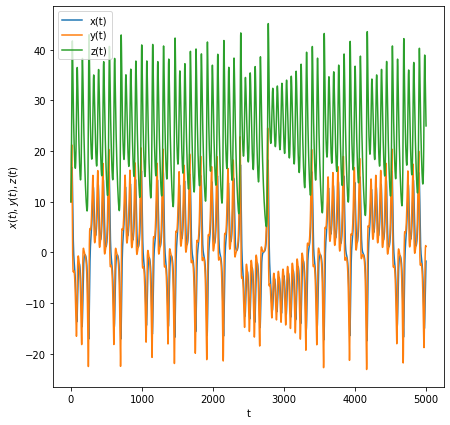

In [8]:
#Plot of the coordinates
fig, ax = plt.subplots(1, 1, figsize=(7,7))
n = 1
ax.plot(sol_lorenz.y[0][::n], label="x(t)")
ax.plot(sol_lorenz.y[1][::n], label="y(t)")
ax.plot(sol_lorenz.y[2][::n], label="z(t)")

ax.set_xlabel("t")
ax.set_ylabel("$x(t), y(t), z(t)$")
plt.legend()
plt.savefig("task4/figures/task4_lorenz_coordinates")

### Takens theorem on Lorenz attractor - embedding of x coordinate

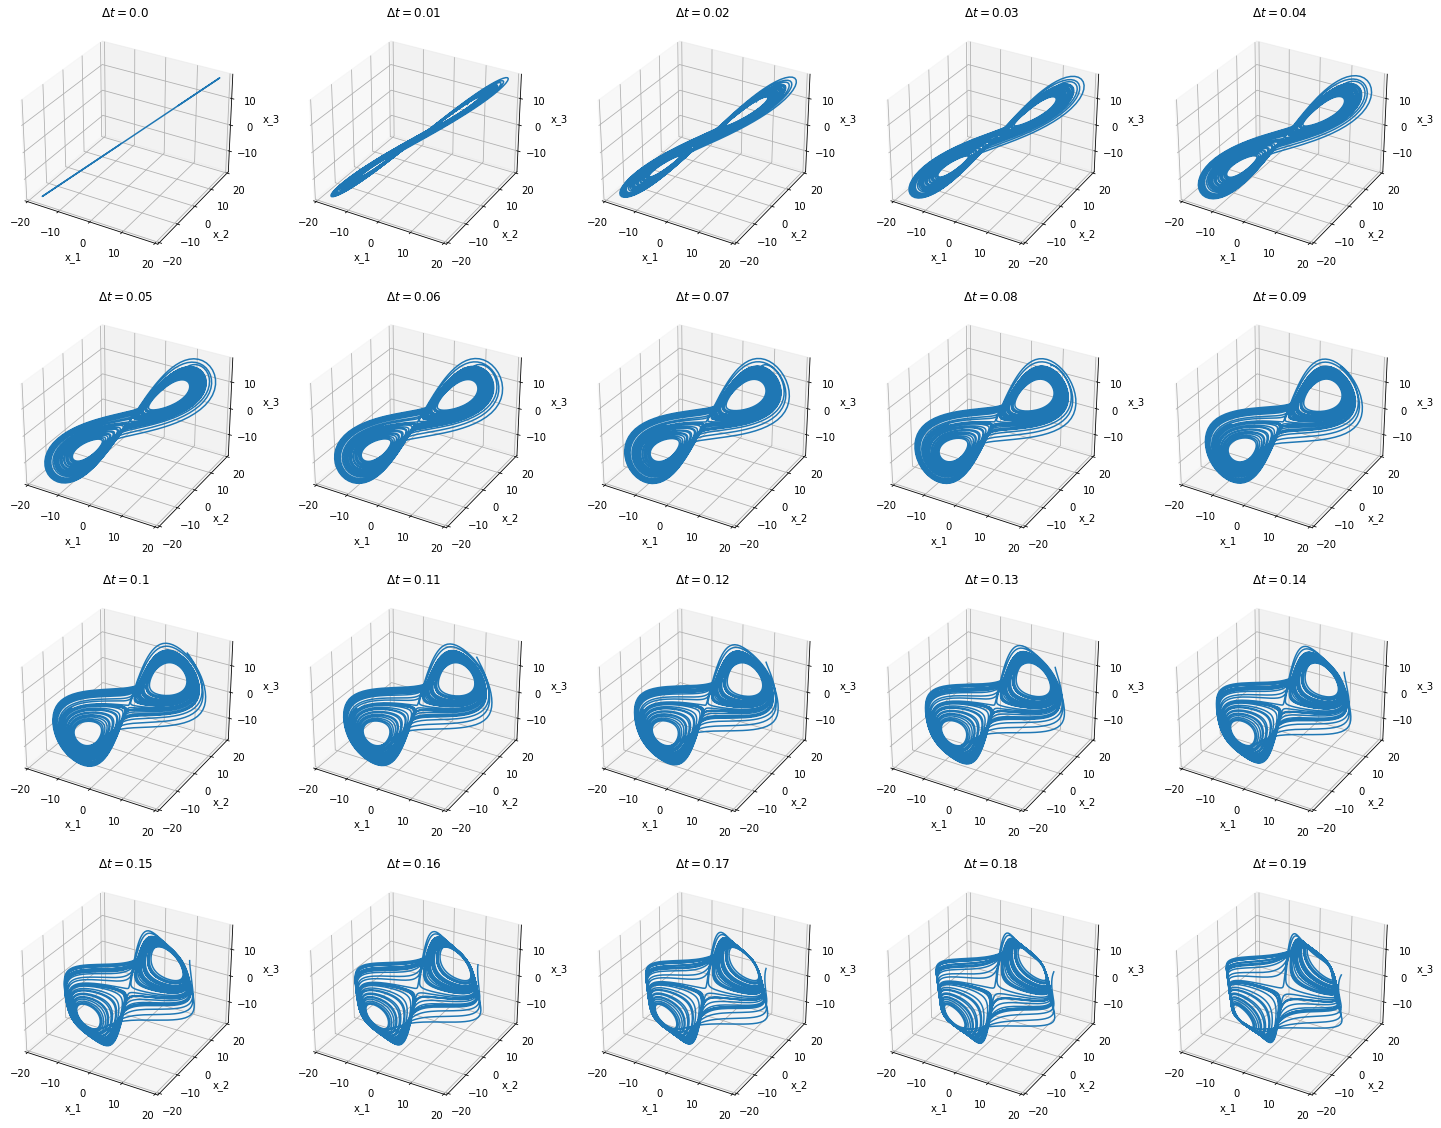

In [9]:
#set delay to one timestep
interval = 1
#imagine we can only measure the x-coordinates
data_x = sol_lorenz.y[0][::n]
len_data = data_x.shape[0]

#plot multiple figures to showcase different delays (different delta_t)
num_figs = 20
num_col = 5
num_row = -(-num_figs // num_col)

figsize = 5
fig, ax = plt.subplots(num_row, num_col, subplot_kw=dict(projection='3d'), figsize=(figsize * num_col, figsize * num_row))

for i in range(num_row):
    for j in range(num_col):
        delay = interval * (i * num_col + j)
        delta_t = dt * delay
        ax[i][j].set_title("$\Delta t = $" +  f"{delta_t:.3}")
        ax[i][j].plot(data_x[0:len_data - 2*delay], data_x[delay: len_data - delay], data_x[2*delay:])
        ax[i][j].set_xlabel('x_1')
        ax[i][j].set_ylabel('x_2')
        ax[i][j].set_zlabel('x_3')
        ax[i][j].set_xlim(-20,20)
        ax[i][j].set_ylim(-20,20)

plt.savefig("task4/figures/task4_lorenz_delayed_x")

### Takens theorem on Lorenz attractor - embedding of z coordinate

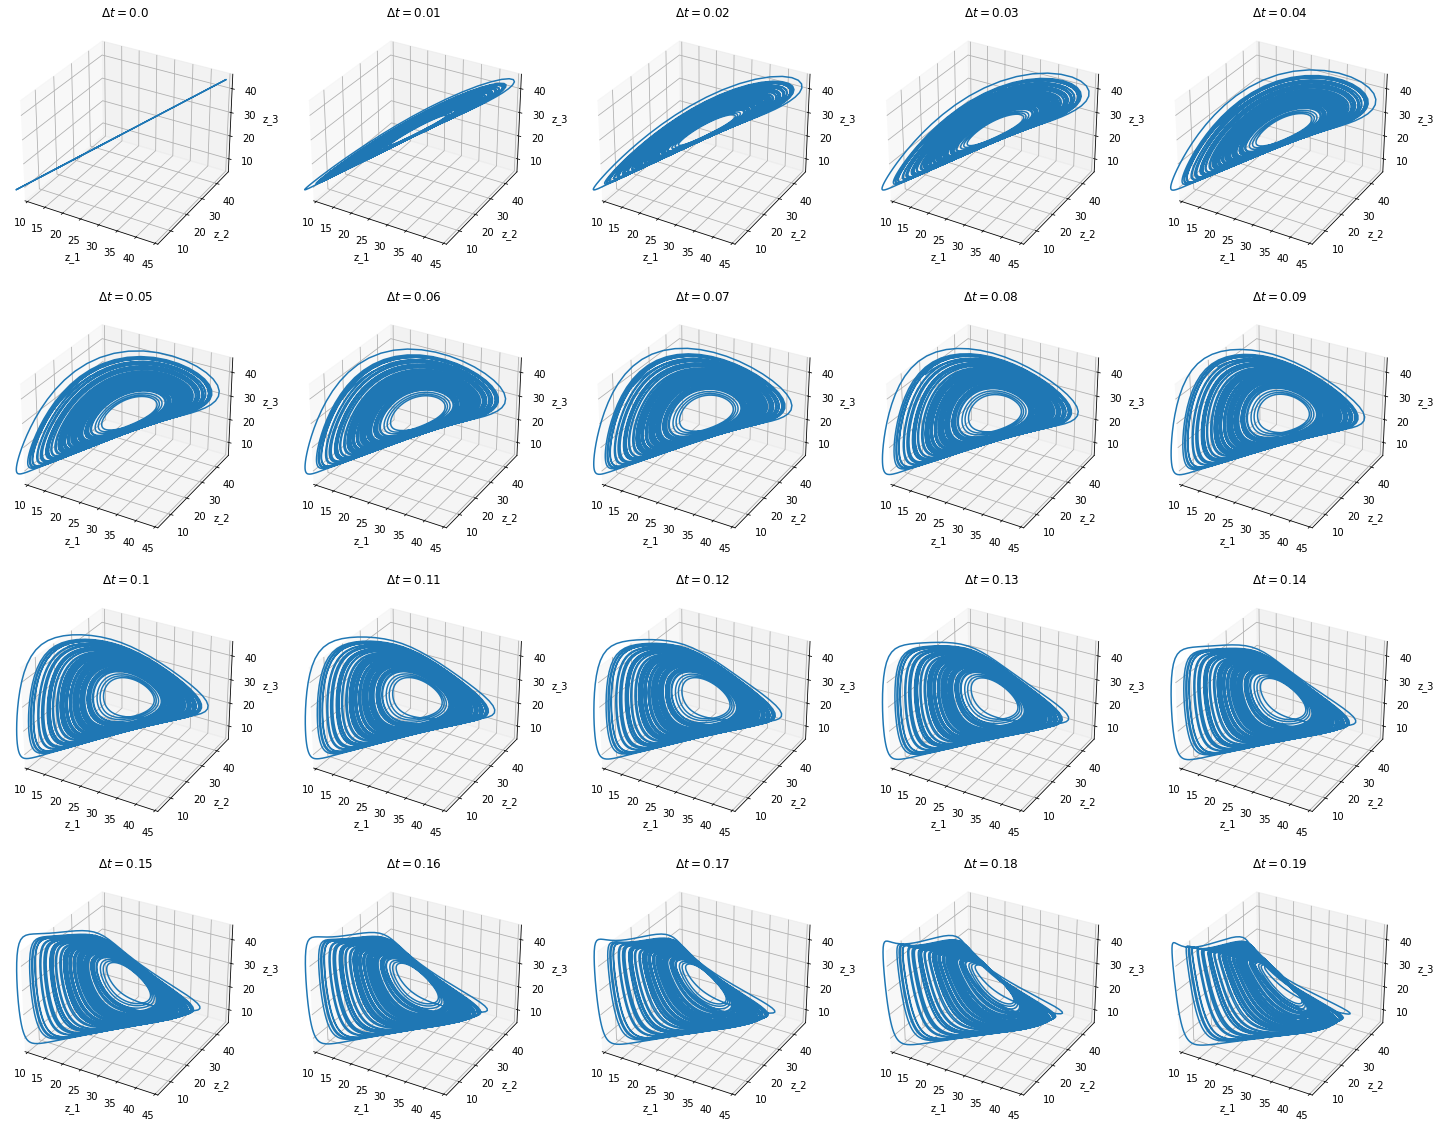

In [10]:
#set delay to one timestep
interval = 1
#imagine we can only measure the z-coordinates
data_z = sol_lorenz.y[2][::n]
len_data = data_z.shape[0]

#plot multiple figures to showcase different delays (different delta_t)
num_figs = 20
num_col = 5
num_row = -(-num_figs // num_col)

figsize = 5
fig, ax = plt.subplots(num_row, num_col, subplot_kw=dict(projection='3d'), figsize=(figsize * num_col, figsize * num_row))

for i in range(num_row):
    for j in range(num_col):
        delay = interval * (i * num_col + j)
        delta_t = dt * delay
        ax[i][j].set_title("$\Delta t = $" +  f"{delta_t:.3}")
        ax[i][j].plot(data_z[0:len_data - 2*delay], data_z[delay: len_data - delay], data_z[2*delay:])
        ax[i][j].set_xlabel('z_1')
        ax[i][j].set_ylabel('z_2')
        ax[i][j].set_zlabel('z_3')
        ax[i][j].set_xlim(10,45)
        
plt.savefig("task4/figures/task4_lorenz_delayed_z")

### Bonus

#### Approximate vector field with radial basis functions

0.18746930675951406


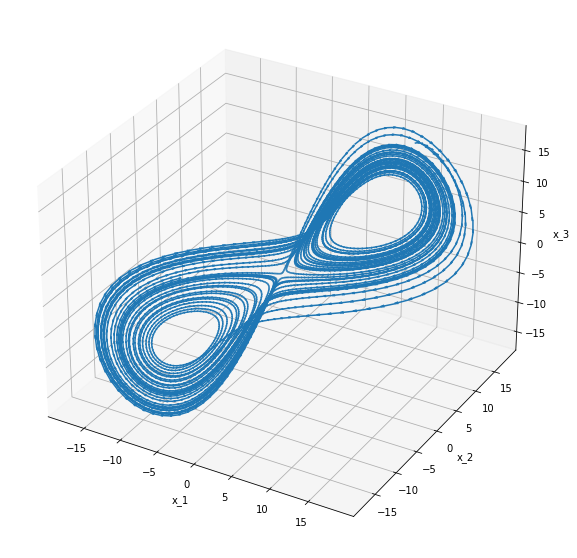

In [38]:
#measure only x coordinate
data_x = sol_lorenz.y[0][::1]
len_data = data_x.shape[0]
#build up new state space using delayed versions with a delay which fits best
delay = 8
lorenz_x = data_x[0:len_data - 2*delay]
lorenz_y = data_x[delay: len_data - delay]
lorenz_z = data_x[2*delay:]

#put in one data
lorenz_data = np.vstack((lorenz_x,lorenz_y,lorenz_z)).T

#calculate vector approximation
delta_t = 0.01
v_x = (lorenz_x[1:] - lorenz_x[0:-1]) / delta_t
v_x = np.hstack((v_x,1))

v_y = (lorenz_y[1:] - lorenz_y[0:-1]) / delta_t
v_y = np.hstack((v_y,1))

v_z = (lorenz_z[1:] - lorenz_z[0:-1]) / delta_t
v_z = np.hstack((v_z,1))

#put vector approximation in one data
lorenz_v = np.vstack((v_x,v_y,v_z)).T

#approximate vector field using radial basis functions
epsilon = 2
L = 100

#get centers for radial basis function
radial_means = find_radial_basis_function_means(lorenz_data, L)

#apply phi function on data
phi_on_lorenz = phi(lorenz_data, radial_means, epsilon)

#calculate matrix A using least squared method
A = least_squares_minimization(phi_on_lorenz, lorenz_v, rcond=2).T

#get vector field approximation
v_hat = phi_on_lorenz.dot(A)

#plot vector field
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'), figsize=(10,10))
ax.quiver(lorenz_x, lorenz_y, lorenz_z, v_hat[:,0]/100, v_hat[:,1]/100, v_hat[:,2]/100)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
plt.savefig("task4/figures/task4_lorenz_radial_vec")

#approximate data
x_hat = calculate_x_from_vector(v_hat, lorenz_data, delta_t)

#calculate error
mse = mean_squared_error(lorenz_x, x_hat[:,0])
print(mse)